# Portfolio Optimization using Monte Carlo Stimulation

# Summary
The objective of this project is to conduct portfolio optimization using Monte Carlo simulation. Specifically, the project aims to:
1) Construct an optimal investment portfolio comprising a diverse set of assets.
2) Maximize expected returns while minimizing portfolio volatility.
3) Analyze the implications of different asset weightings on portfolio performance.
4) Provide insights into the risk-return trade-off and the efficient frontier.
I will simulate weights on individual companies within a given portfolio to obtain an understanding on what return to risk is desired by the individual.

I picked 14 or so companies that are spread out in their corresponding Industries such that we have a relatively "low" correlation with each other.

# Companies
### TCS | Persistent | ICICI BANK | Bajaj Finance
### Dr.Reddy Laboratories | Cipla 
### Tata Consumer Products | Hindustan Unilever
### JSW Steeel | Tata Steel | Siemens | Infosys 
### Eicher Motor | Maruti Suzuki

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import scipy
import matplotlib.pyplot as plt

# Obtaining the Data

### Companies of Interest (with their associated ticker)

| Technology | Finance | Health | Consumer | Metals | Industrials | Auto Sector |
| --- | --- | --- |--- | --- | --- | --- |
| (TCS.NS) Tata consultancy Service Limited | (ICICIBANK.NS) ICICI Bank | (DRREDDY.NS) Dr. Reddy's Laboratories | (TATACONSUM.NS) Tata Consumer Products  | (JSWSTEEL.NS) JSW STEEL LIMITED | (SIEMENS.NS) SIEMENS|(EICHERMOT.NS) Eicher Motors Limited |
| (PERSISTENT.NS) Persistant system | (BAJFINANCE.NS) Bajaj Finance Limited | (CIPLA.NS) Cipla Limited | (HINDUNILVR.NS) Hindustan Unilever Limited | (TATASTEEL.NS) Tata Steel Limited | (INFY.NS) Infosys  |(MARUTI.NS) Maruti Suzuki India Limited |

In [3]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.
# The ticker names of the companies that we will be looking at.

def get_historical_Data(tickers):
    """
    This function returns a pd dataframe with all of the adjusted closing information
    """
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        ticker_data = yf.download(i, start='2018-02-01', end='2024-02-01')['Adj Close']
        data = pd.concat([data, ticker_data], axis=1)
        names.append(i)
    data.columns = tickers
    return data

#    The ticker names of the companies that we will be looking at.
ticks = ["TCS.NS", "PERSISTENT.NS", "ICICIBANK.NS","BAJFINANCE.NS", "DRREDDY.NS", "CIPLA.NS", "TATACONSUM.NS","HINDUNILVR.NS", "JSWSTEEL.NS","TATASTEEL.NS","SIEMENS.NS","INFY.NS","EICHERMOT.NS","MARUTI.NS"]
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(1480, 14)


,TCS.NS,PERSISTENT.NS,ICICIBANK.NS,BAJFINANCE.NS,DRREDDY.NS,CIPLA.NS,TATACONSUM.NS,HINDUNILVR.NS,JSWSTEEL.NS,TATASTEEL.NS,SIEMENS.NS,INFY.NS,EICHERMOT.NS,MARUTI.NS
2024-01-24 00:00:00,3841.800049,8444.399414,999.200012,7055.299805,5902.100098,1417.349976,1159.000000,2441.649902,812.200012,135.149994,4189.247559,1675.400024,3635.000000,9988.200195
2024-01-25 00:00:00,3810.300049,8347.708984,1009.950012,7085.500000,5855.500000,1369.650024,1136.750000,2428.300049,815.700012,133.750000,4195.632812,1669.099976,3616.449951,9881.000000
2024-01-29 00:00:00,3801.000000,8605.599609,1016.400024,7191.649902,5843.700195,1336.849976,1141.050049,2444.399902,811.700012,135.000000,4295.549805,1656.599976,3669.050049,9991.400391
2024-01-30 00:00:00,3800.550049,8373.849609,1016.900024,6817.200195,5840.950195,1317.099976,1122.900024,2458.649902,812.000000,134.699997,4143.549805,1651.449951,3704.750000,9951.650391
2024-01-31 00:00:00,3815.949951,8353.150391,1028.150024,6862.899902,6121.149902,1351.000000,1118.000000,2481.550049,818.650024,135.949997,4140.399902,1660.900024,3839.600098,10186.900391


<Axes: title={'center': 'Stock prices of the considered assets'}>

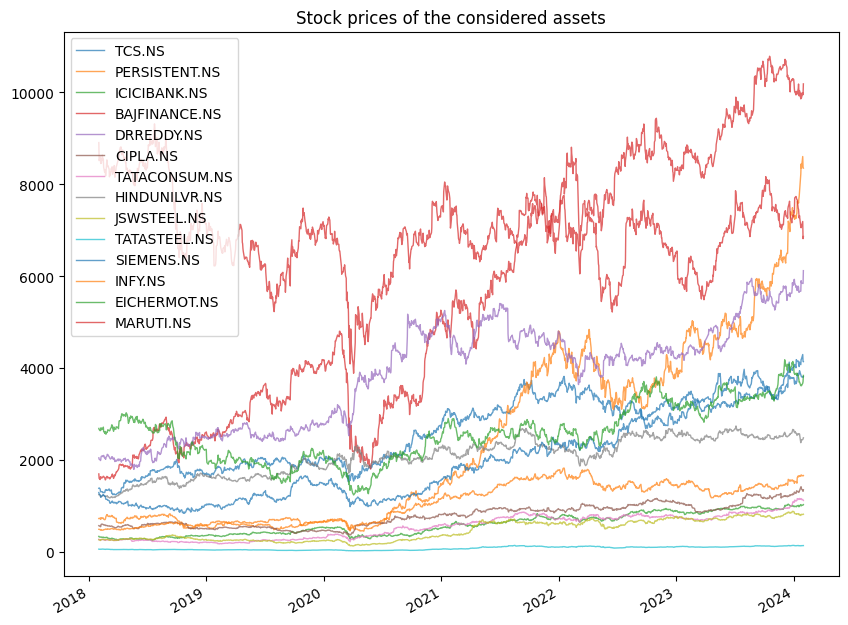

In [4]:
d.plot(title='Stock prices of the considered assets', figsize=(10,8), alpha=0.7,linewidth=1.0)

In [5]:
#Spilting data into 80-20 ratio
# Calculate the index to split the data
split_index = int(len(d) * 0.8)

# Split the data into training and testing sets
train_data = d.iloc[:split_index] # Data Train for the Simulation
test_data = d.iloc[split_index:] # Data test

print("Training Data dimensions:", train_data.shape)
print("Testing Data dimensions:", test_data.shape)


Training Data dimensions: (1184, 14)
Testing Data dimensions: (296, 14)


In [6]:
test_data # Testing Data

,TCS.NS,PERSISTENT.NS,ICICIBANK.NS,BAJFINANCE.NS,DRREDDY.NS,CIPLA.NS,TATACONSUM.NS,HINDUNILVR.NS,JSWSTEEL.NS,TATASTEEL.NS,SIEMENS.NS,INFY.NS,EICHERMOT.NS,MARUTI.NS
2022-11-21,3163.382568,3615.962402,913.877625,6622.698242,4316.097168,1095.564575,762.558289,2463.071045,693.628357,100.955002,2795.404297,1507.349854,3341.715820,8782.551758
2022-11-22,3193.682373,3668.037109,916.158813,6628.598145,4328.648926,1095.217407,762.904419,2477.151855,705.279297,101.874977,2787.400391,1523.546143,3338.204590,8791.022461
2022-11-23,3187.275391,3690.319336,919.878235,6722.795410,4371.464355,1099.086060,761.766968,2468.929932,717.527710,102.117073,2753.844238,1521.719849,3343.990479,8851.206055
2022-11-24,3256.497070,3842.145508,931.185120,6714.169434,4379.600586,1086.537842,784.120972,2510.089355,722.905029,102.165497,2800.474854,1566.559692,3340.479492,8883.501953
2022-11-25,3265.649414,3923.666504,922.704895,6690.520508,4383.817871,1096.457397,780.560181,2498.568359,723.153992,102.843369,2762.593750,1572.182495,3376.828369,8935.413086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,3841.800049,8444.399414,999.200012,7055.299805,5902.100098,1417.349976,1159.000000,2441.649902,812.200012,135.149994,4189.247559,1675.400024,3635.000000,9988.200195
2024-01-25,3810.300049,8347.708984,1009.950012,7085.500000,5855.500000,1369.650024,1136.750000,2428.300049,815.700012,133.750000,4195.632812,1669.099976,3616.449951,9881.000000
2024-01-29,3801.000000,8605.599609,1016.400024,7191.649902,5843.700195,1336.849976,1141.050049,2444.399902,811.700012,135.000000,4295.549805,1656.599976,3669.050049,9991.400391
2024-01-30,3800.550049,8373.849609,1016.900024,6817.200195,5840.950195,1317.099976,1122.900024,2458.649902,812.000000,134.699997,4143.549805,1651.449951,3704.750000,9951.650391


In [7]:
train_data # Train

,TCS.NS,PERSISTENT.NS,ICICIBANK.NS,BAJFINANCE.NS,DRREDDY.NS,CIPLA.NS,TATACONSUM.NS,HINDUNILVR.NS,JSWSTEEL.NS,TATASTEEL.NS,SIEMENS.NS,INFY.NS,EICHERMOT.NS,MARUTI.NS
2018-02-01,1384.221436,725.089661,336.149231,1696.062988,2046.147461,568.761902,273.629913,1245.407104,263.590057,58.438702,1291.298462,489.897827,2686.531738,8908.147461
2018-02-02,1390.858765,731.760681,325.371490,1597.454224,2013.529419,563.045776,260.819031,1246.269531,260.411133,56.232826,1261.155762,489.320099,2663.964600,8518.493164
2018-02-05,1368.608643,718.791809,320.128235,1573.966431,2006.844971,562.028442,259.158447,1231.329590,253.661377,55.696037,1237.890503,487.158478,2637.738037,8603.767578
2018-02-06,1321.881592,732.040710,321.099213,1630.062378,1987.122437,546.672241,253.085114,1203.718994,246.650314,55.733784,1225.209473,474.125793,2641.694336,8512.807617
2018-02-07,1303.269653,708.015503,322.895477,1609.958008,2002.009277,551.516479,265.848511,1192.184692,252.572632,55.507336,1187.458008,474.682190,2682.996826,8453.306641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,3213.480225,3789.280762,887.643555,6966.470215,4329.790039,1120.413086,759.393066,2420.139160,716.382568,105.264351,2887.621582,1523.786377,3478.209229,9067.024414
2022-11-15,3210.686768,3773.520264,904.256775,6966.420898,4399.296875,1109.749512,764.338684,2419.843750,719.320129,105.119095,2833.434570,1532.148804,3469.653564,9076.783203
2022-11-16,3232.604248,3767.195801,906.141235,6836.824707,4446.229492,1112.179810,761.173462,2439.882080,705.279297,103.182312,2863.560547,1540.607300,3464.807129,9049.787109
2022-11-17,3226.486328,3731.277588,912.290649,6836.824707,4386.992676,1110.493530,777.444458,2422.305420,705.627808,102.504433,2853.418945,1525.804810,3404.275391,8902.671875


# Understanding Returns

The geometric average return formula is:

$$
\text{Geometric Average Return} = \left( \prod_{i=1}^{n} (1 + r_i) \right)^{\frac{1}{n}} - 1
$$

In this formula:
- $( r_i )$ represents the individual returns for each period.
- $( n )$ is the total number of periods.

In [8]:
from scipy import stats
expected_returns_a = d.pct_change().dropna() # Daily returns from trading day to day...
expected_returns_a.columns = ticks # Setting the Column names 
expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*252) # Annualizing the average rate of return
expected_returns_aA = expected_returns_aA.T # Transpose the values 

dar = d.pct_change()+1 # dar = portfolio returns for each period (in this case day to day)
# 5 is the number of years I am working with (Note: Remember that earlier I've took out a year for training purposes.)
gar = pd.DataFrame(np.prod(dar)**(1/float(5)) - 1) # Geometric Average Rate of Return
gar.dropna(inplace=True)
# print(gar)
full_return_annual = (pd.concat([expected_returns_aA.T, gar], axis = 1))
# DO NOTE that Arithmetic Average Return is not usually an appropriate method
# for calculating the average return and telling others...

#Cumulative Return is straightforward and provides a single value that represents the total return over a specific period.
#It does not consider the compounding effect of returns over time. It is useful for quickly understanding the total return of an investment over a specified period.

#Geometric Average Return, on the other hand, considers the compounding effect of returns over multiple periods. 
#It provides a more accurate measure of the average rate of return over time, especially when the investment experiences volatility or varying returns over different periods.


full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
print("Expected Annual Returns ", expected_returns_aA)
print("Full Annual Return", full_return_annual)

Expected Annual Returns      TCS.NS  PERSISTENT.NS  ICICIBANK.NS  BAJFINANCE.NS  DRREDDY.NS  CIPLA.NS  \
0  0.20356       0.481222      0.243794       0.313683    0.221821  0.184683   

   TATACONSUM.NS  HINDUNILVR.NS  JSWSTEEL.NS  TATASTEEL.NS  SIEMENS.NS  \
0       0.287716       0.144813     0.259758      0.216517    0.241522   

    INFY.NS  EICHERMOT.NS  MARUTI.NS  
0  0.248114      0.115383   0.068998  
Full Annual Return                Average Arithmetic Returns  Average Geometric Returns
TCS.NS                           0.203560                   0.224840
PERSISTENT.NS                    0.481222                   0.630391
ICICIBANK.NS                     0.243794                   0.250561
BAJFINANCE.NS                    0.313683                   0.322553
DRREDDY.NS                       0.221821                   0.245028
CIPLA.NS                         0.184683                   0.188899
TATACONSUM.NS                    0.287716                   0.325121
HINDUNILVR.NS   

c:\Users\Hare Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


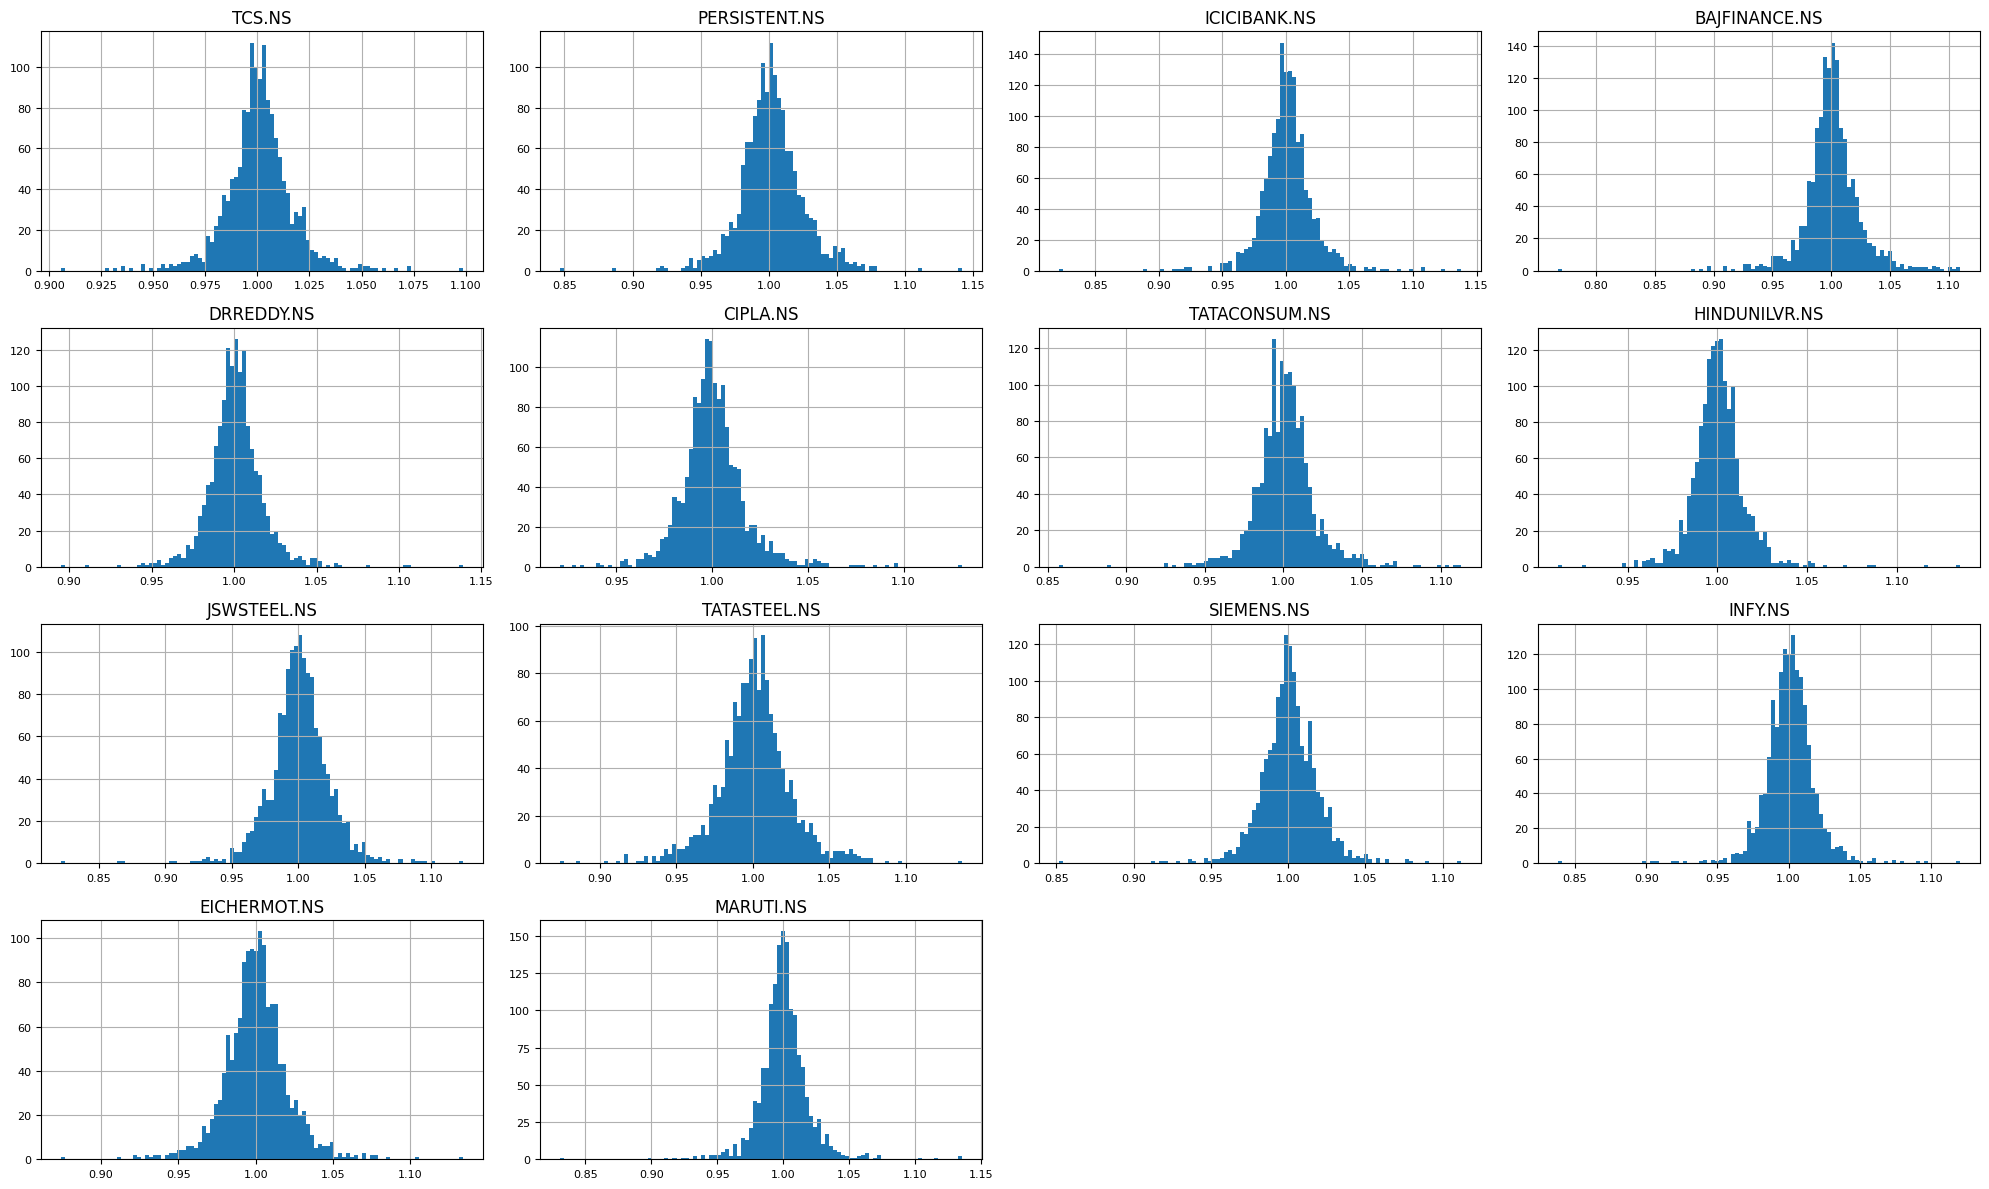

In [9]:
dar.hist(bins=100, figsize=(20,12), xlabelsize=8, ylabelsize=8);
plt.tight_layout()

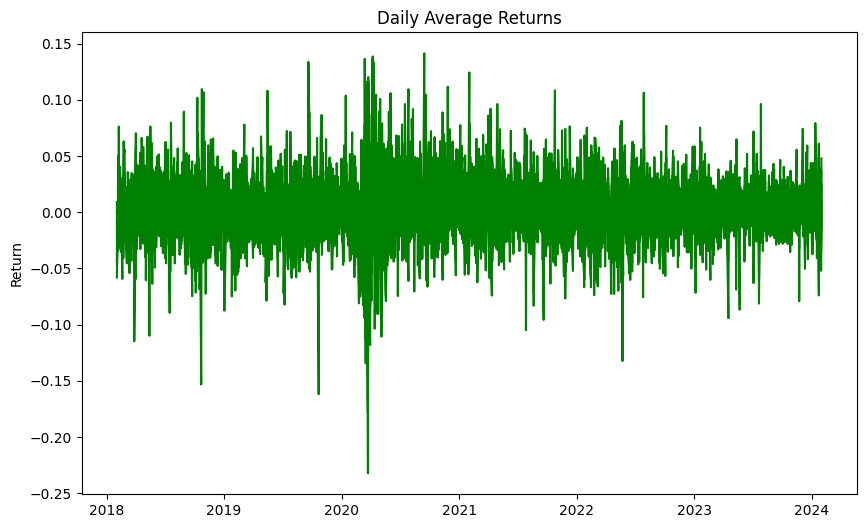

In [10]:
# Plotting daily portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(expected_returns_a.index, expected_returns_a.values, color='g')
plt.ylabel('Return')
plt.title('Daily Average Returns')
plt.show()

# Equations Utilized

## Measuring the Adjusted Risk of Return
Measures the risk adjusted rate of return of a portfolio.
$$
\begin{aligned}
Sharpe Ratio = \frac{R_p - R_f}{\sigma_p}
\end{aligned}
$$
$\sigma_p$ = Standard Deviation of Portfolio \
$R_p$ = Return of Portfolio \
$R_f$ = Return of Risk Free Instrument
\
Rule of Thumb: 
Sharpe Ratio < 1 sub-optimal... There is most likely a better option \
Sharpe Ratio > 1 is acceptable \
Sharpe Ratio > 2 is VERY good \
Sharpe Ratio > 3 is EXCELLENT! 

# Volatility
$$
\begin{aligned}
\sum_{i=0}^N \sum_{j=0}^N {\sigma_{ij}}{X_i X}
\end{aligned}
$$
$X$ = Weights in Portfolio \
$\sigma_{ij}$ = Variance - Covariance Matrix

# Expected Return
$$
\begin{aligned}
\sum_{i=0}^N X_i \mu_i
\end{aligned}
$$
\
$X$ = Weights in Porfolio \
$\mu_i$ = Arithmetic Average Rate of Return for $i^{th}$ security

In [11]:
# Storing lists that retain returns, volatility, and weights of the Simulated portfolios
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

# This is what is going to be randomized
stock_weights = []

# Number of Indiviudal securities that will be a part of the portfolio
num_assets = len(ticks)

# Number of simulated iterations
num_portfolios = 100000

# Getting the covariance matrix
# Gets a percentage change one day to the next #training
daily_returns = train_data.pct_change().dropna()

# Converting daily returns to annual returns (standardizing to a year)
annual_returns = ((daily_returns.mean()) * 252) + 1 #growth factor

# Obtaining the covariance of annual
cov_daily = daily_returns.cov() # Covariance
cov_annual = cov_daily*252 # Covariance Annualized


In [12]:
# Setting seed of interpretability
np.random.seed()
#By setting the random seed to 3 before generating the random numbers, the sequence of random numbers will be the same every time you run the code.
# Filling in the lists with a simulated return, risk, and a given weight
# num_portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights = np.random.random(num_assets)
    # Standardize the weights
    weights /= weights.sum()
    returns = (np.dot(weights, (annual_returns)))
    ## Excepted Variance
    volatility = np.sqrt(np.dot(weights.transpose(), np.dot(cov_annual, weights)))
    
    """
    sharpe ratio: This calculates the risk adjusted return
    It suggests that adding assets to a portfolio that have low correlation can decrease portfolio risk without 
    sacrificing return 
    """
    sharpe = ((returns-1)/volatility)
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)


In [13]:
# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,TCS.NS Weight,PERSISTENT.NS Weight,ICICIBANK.NS Weight,BAJFINANCE.NS Weight,DRREDDY.NS Weight,CIPLA.NS Weight,TATACONSUM.NS Weight,HINDUNILVR.NS Weight,JSWSTEEL.NS Weight,TATASTEEL.NS Weight,SIEMENS.NS Weight,INFY.NS Weight,EICHERMOT.NS Weight,MARUTI.NS Weight
0,0.231034,0.194174,1.189829,0.128090,0.032399,0.017080,0.121273,0.071015,0.088948,0.085180,0.129810,0.071798,0.027679,0.010649,0.073100,0.107386,0.035592
1,0.227174,0.197958,1.147588,0.083280,0.092916,0.076491,0.016402,0.049597,0.102837,0.070202,0.043751,0.074785,0.085350,0.044939,0.087139,0.100641,0.071669
2,0.218099,0.200200,1.089406,0.099137,0.068738,0.127487,0.017106,0.115110,0.040769,0.083848,0.008710,0.021757,0.074533,0.094350,0.040960,0.133260,0.074235
3,0.212650,0.187753,1.132603,0.040373,0.107209,0.014671,0.062465,0.143020,0.089702,0.013938,0.100882,0.021824,0.005610,0.051954,0.088194,0.143413,0.116745
4,0.232087,0.205515,1.129295,0.027293,0.064272,0.009059,0.128275,0.129288,0.058496,0.065049,0.027836,0.095379,0.004067,0.035299,0.117167,0.128841,0.109680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.243190,0.214318,1.134720,0.009933,0.117642,0.120107,0.055401,0.019736,0.105225,0.120202,0.003443,0.106386,0.017471,0.097604,0.037414,0.103127,0.086308
99996,0.262490,0.197507,1.329015,0.036630,0.141001,0.120688,0.042958,0.063894,0.075351,0.130013,0.093376,0.076274,0.020814,0.063063,0.077751,0.051556,0.006631
99997,0.224154,0.202476,1.107065,0.075399,0.069275,0.065488,0.053218,0.098043,0.027958,0.088838,0.010776,0.032713,0.076207,0.114830,0.084412,0.102582,0.100262
99998,0.213878,0.201596,1.060923,0.047820,0.009390,0.157458,0.072918,0.086238,0.113934,0.041383,0.019816,0.000682,0.027518,0.031253,0.171051,0.056345,0.164196


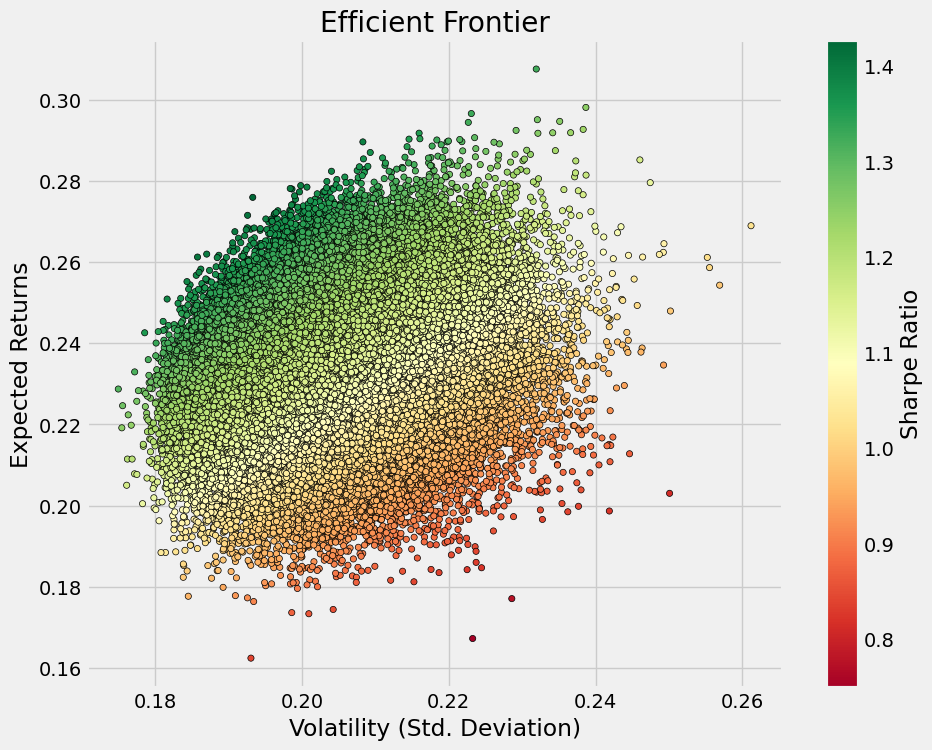

In [14]:
# PLotting the efficient frontier.
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

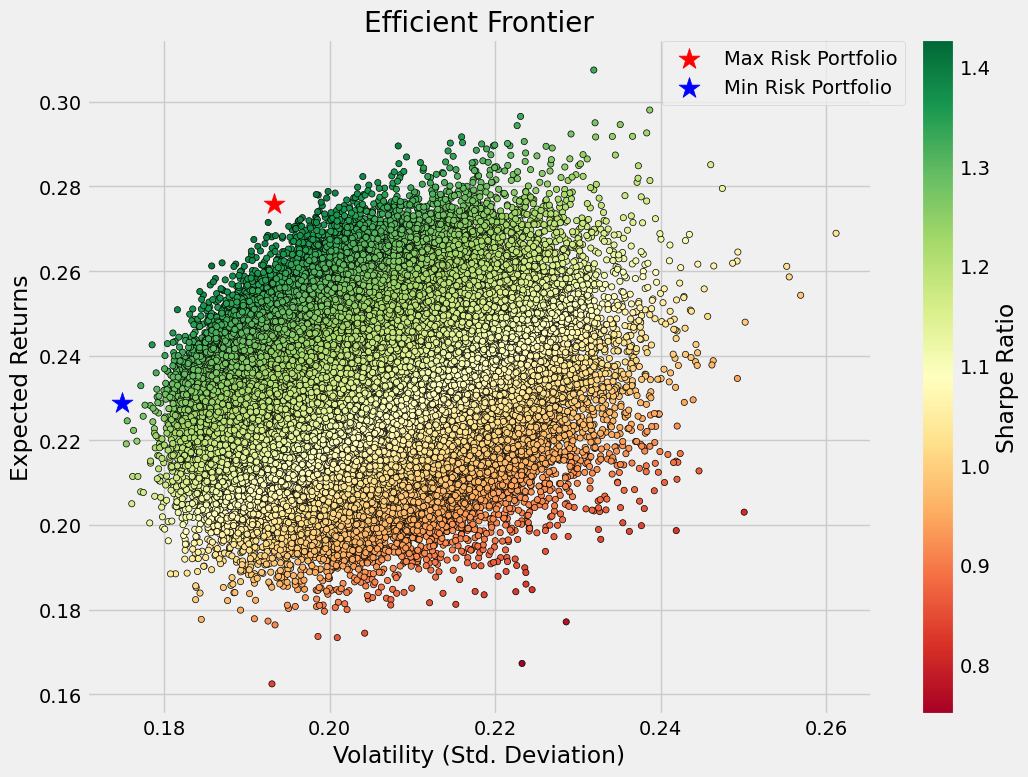

In [15]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(11, 8),grid=True)

plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='*', s=250, label='Max Risk Portfolio')
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='*', s=250, label='Min Risk Portfolio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.legend(loc='center left', bbox_to_anchor=(0.72, 0.95))
plt.tight_layout()
plt.show()

In [16]:
# Additional Details
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]
print(r_ef)

                      Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                                   0.228717                  0.275914
Volatility                                0.174939                  0.193266
Sharpe Ratio                              1.307408                  1.427640
TCS.NS Weight                             0.134594                  0.013899
PERSISTENT.NS Weight                      0.061902                  0.211830
ICICIBANK.NS Weight                       0.035462                  0.014845
BAJFINANCE.NS Weight                      0.029281                  0.113763
DRREDDY.NS Weight                         0.130932                  0.100557
CIPLA.NS Weight                           0.127533                  0.157008
TATACONSUM.NS Weight                      0.018158                  0.015486
HINDUNILVR.NS Weight                      0.173771                  0.082607
JSWSTEEL.NS Weight                        0.001947                  0.001809

# If I were to invest 10,00,000 last year... what would I have now?

In [17]:
amount_invest = 1000000
expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"Rupee on |", test_data.index[0],"| I would have...")
actual_return = (test_data.iloc[test_data.shape[0]-1,:] - test_data.iloc[0,:]) / ( test_data.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (test_data.iloc[0,:])
end_price = test_data.iloc[test_data.shape[0]-1,:]
print("----------------------------------------------------------------")
# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance ₹1000000 : Ending with ₹",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance ₹1000000 : Ending with ₹", round(money_left1,2))
print("")


----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                  1.228717e+06              1.275914e+06

----------------------------------------------------------------
If I invested 1000000 Rupee on | 2022-11-21 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance ₹1000000 : Ending with ₹ 1265655.35

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance ₹1000000 : Ending with ₹ 1420642.24

